In [4]:
# que1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
#initialize random seed
roll_num=102317119
np.random.seed(roll_num)
#generate sales data 
sales_data=np.random.randint(1000,5000,size=(12,4))
# convert to dataframe
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
categories=["Electronics","Clothing","Home &kitchen","sports"]
df=pd.DataFrame(sales_data,columns=categories,index=months)
df.head()

,Electronics,Clothing,Home &kitchen,sports
Jan,1909,2239,3544,4410
Feb,2884,1412,1423,2206
Mar,3045,4260,1818,1384
Apr,4533,3696,4146,4124
May,4138,4482,4939,4367


# summary statistics 

In [6]:
df.describe()

,Electronics,Clothing,Home &kitchen,sports
count,12.000000,12.000000,12.000000,12.000000
mean,3363.250000,2722.916667,3236.666667,3373.583333
std,1143.003231,1166.164612,1256.233500,1269.961951
min,1120.000000,1030.000000,1423.000000,1384.000000
25%,2762.250000,1968.250000,2273.250000,2185.000000
50%,3550.500000,2619.000000,3163.500000,4197.500000
75%,4211.000000,3777.250000,4311.250000,4377.750000
max,4721.000000,4482.000000,4939.000000,4620.000000


# part 2 Data manipulation and analysis

In [9]:
# total sales per category
total_sales_per_category=df.sum()
print("total sales per category\n",total_sales_per_category)
#total sales per month
df["total_sales_per_month"]=df.sum(axis=1)
print("total sales per month \n",df["total_sales_per_month"])


total sales per category
 Electronics      40359
Clothing         32675
Home &kitchen    38840
sports           40483
dtype: int64
total sales per month 
 Jan    12102
Feb     7925
Mar    10507
Apr    16499
May    17926
Jun     8612
Jul    16703
Aug    13780
Sep    13551
Oct     8005
Nov    10480
Dec    16267
Name: total_sales_per_month, dtype: int64


In [10]:
# calculate average sales growth between consecutive months
df["Growth Rate"]=df["total_sales_per_month"].pct_change()*100
print("\ngrowth rate:\n",df["Growth Rate"])


growth rate:
 Jan          NaN
Feb   -34.514956
Mar    32.580442
Apr    57.028648
May     8.649009
Jun   -51.958050
Jul    93.950302
Aug   -17.499850
Sep    -1.661829
Oct   -40.926869
Nov    30.918176
Dec    55.219466
Name: Growth Rate, dtype: float64


In [11]:
#apply a randomized discount based on roll number
if roll_num%2== 0:
    df["Electronics"]*=0.90 # 10% discount 
else :
    df["Clothing"]*=0.85 # 15% discount 
print("updated Data with Discount Applied:\n",df.head())

updated Data with Discount Applied:
      Electronics  Clothing  Home &kitchen  sports  total_sales_per_month  \
Jan         1909   1903.15           3544    4410                  12102   
Feb         2884   1200.20           1423    2206                   7925   
Mar         3045   3621.00           1818    1384                  10507   
Apr         4533   3141.60           4146    4124                  16499   
May         4138   3809.70           4939    4367                  17926   

     Growth Rate  
Jan          NaN  
Feb   -34.514956  
Mar    32.580442  
Apr    57.028648  
May     8.649009  


# part 3 Visualizations 

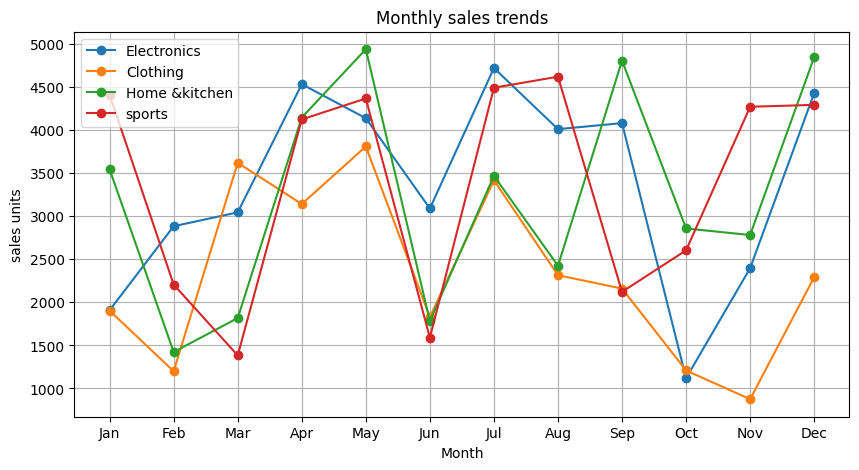

In [12]:
#line plot for Monthly sales trends 
plt.figure(figsize=(10,5))
for category in categories:
    plt.plot(df.index,df[category],marker='o',label=category)
plt.title("Monthly sales trends")
plt.xlabel("Month")
plt.ylabel("sales units")
plt.legend()
plt.grid()
plt.show()

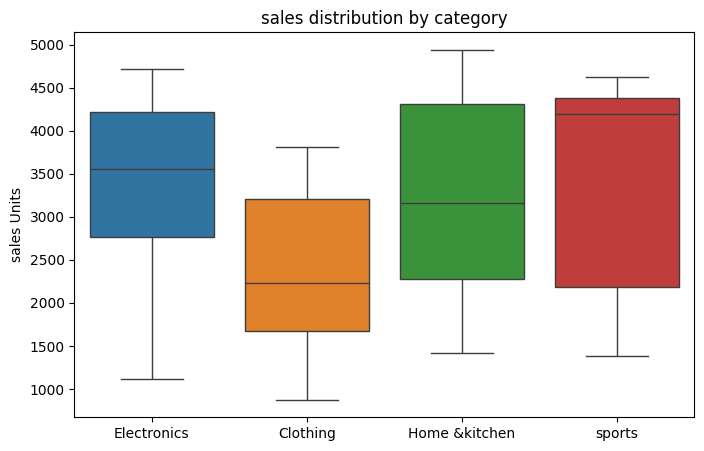

In [13]:
#box plot for sales Distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=df[categories])
plt.title("sales distribution by category")
plt.ylabel("sales Units")
plt.show()

# QUE2 

In [14]:
import numpy as np 
array=np.array([[1,-2,3],[-4,5,-6]])
# Element wise absolute value
absolute_values = np.abs(array)
print("element-wise absolute values: \n",absolute_values)

element-wise absolute values: 
 [[1 2 3]
 [4 5 6]]


In [16]:
# ii
flattened_percentile=np.percentile(array,[25,50,75])
column_perc=np.percentile(array,[25,50,75],axis=0)
row_perc=np.percentile(array,[25,50,75],axis=1)
print("flattened percentile",flattened_percentile)
print("column  percentile",column_perc)
print("row  percentile",row_perc)

flattened percentile [-3.5 -0.5  2.5]
column  percentile [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
row  percentile [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]


In [17]:
#iii
flattened_mean=np.mean(array)
flattened_median=np.median(array)
flattened_std=np.std(array)

column_mean=np.mean(array,axis=0)
column_median=np.median(array,axis=0)
column_std=np.std(array,axis=0)

row_mean=np.mean(array,axis=1)
row_median=np.median(array,axis=1)
row_std=np.std(array,axis=1)

print("flattened array \n mean=",flattened_mean,"median=",flattened_median,"std=",flattened_std)
print("column array \n mean=",column_mean,"median=",column_median,"std=",column_std)
print("row array \n mean=",row_mean,"median=",row_median,"std=",row_std)


flattened array 
 mean= -0.5 median= -0.5 std= 3.8622100754188224
column array 
 mean= [-1.5  1.5 -1.5] median= [-1.5  1.5 -1.5] std= [2.5 3.5 4.5]
row array 
 mean= [ 0.66666667 -1.66666667] median= [ 1. -4.] std= [2.05480467 4.78423336]


# QUES3 Floor , Ceiling , Truncated, and Rounded values of an array

In [18]:
import numpy as np
a= np.array([-1.8,-1.6,-0.5,0.5,1.6,1.8,3.0])
floor_values= np.floor(a)
ceiling_values= np.ceil(a)
truncated_values=np.trunc(a)
rounded_values=np.round(a)
print("original Array",a)
print("Floor values :",floor_values)
print("ceiling_values:",ceiling_values)
print("truncated values ",truncated_values)
print("rounded values",rounded_values)

original Array [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]
Floor values : [-2. -2. -1.  0.  1.  1.  3.]
ceiling_values: [-1. -1. -0.  1.  2.  2.  3.]
truncated values  [-1. -1. -0.  0.  1.  1.  3.]
rounded values [-2. -2. -0.  0.  2.  2.  3.]


# que4 swap two elements in a list

In [20]:
def swap(list,index1,index2):
    temp=list[index1]
    list[index1]=list[index2]
    list[index2]=temp
my_list=[10,20,30,40,50]
print("original list",my_list)
# swap 
swap(my_list,1,3)
print("list after swaping ",my_list)

original list [10, 20, 30, 40, 50]
list after swaping  [10, 40, 30, 20, 50]


# que5 

In [21]:
def swap_elements_in_set(s,el1,el2):
    lst = list(s)
    if el1 in lst and el2 in lst:
        index1,index2=lst.index(el1),lst.index(el2)
        lst[index1],lst[index2]=lst[index2],lst[index1]
        return set(lst)
    else:
        print("one or both elements not found in the set.")
        return s
my_set={10,20,30,40,50}
print("original set",my_set)
new_set= swap_elements_in_set(my_set,20,40)
print("set after swapping 20 and 40 :",new_set)
        

original set {50, 20, 40, 10, 30}
set after swapping 20 and 40 : {40, 10, 50, 20, 30}
